<a href="https://colab.research.google.com/github/linapaolap/data_exercises/blob/main/Limpieza%26dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1zQFMBo0SYfYx8vOFgq5YcPBs1-XVQP0HKii1MNuvSrI/export?format=csv")

# Sobre el DataSet

Pertenece al Ranking Forbes 2022 de las 2000 empresas mejor posicionadas del año. El set contiene:

1. Lugar en el ranking
2. Nombre de la Organización
3. Industria a la que pertenece
4. País donde se ubica
5. Año de fundación 
6. Nombre del CEO de la empresa
7. Ingresos de la empresa
8. Ganancias de la empresa
9. Valor en el mercado 
10. Total de Empleados


In [3]:
df.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [4]:
#Se encuentran los datos nulos en todo el dataset
df.isnull().sum()

2022 Ranking               0
Organization Name          0
Industry                   0
Country                    0
Year Founded               0
CEO                        0
Revenue (Billions)         0
Profits (Billions)         2
Assets (Billions)          0
Market Value (Billions)    0
Total Employees            0
dtype: int64

In [5]:
# df.drop("2022 Ranking", axis=1, inplace=True)

In [6]:
#Se eliminan las filas identicas y se refleja el numero antes y después.
print(f"Tamaño del data set antes de eliminar filas repetidas: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Tamaño del data set después de eliminar filas repetidas: {df.shape}")

Tamaño del data set antes de eliminar filas repetidas: (2005, 11)
Tamaño del data set después de eliminar filas repetidas: (1999, 11)


In [7]:
#Se sustituyen valores nulos por el dato de 0, mediante método fillna
df = df.fillna(0)

In [8]:
#Se verifica que no haya ningun dato nulo todavía
df.isnull().sum()

2022 Ranking               0
Organization Name          0
Industry                   0
Country                    0
Year Founded               0
CEO                        0
Revenue (Billions)         0
Profits (Billions)         0
Assets (Billions)          0
Market Value (Billions)    0
Total Employees            0
dtype: int64

In [9]:
#pasamos a conocer los tipos datos que se encuentran en el data set, se encuentran unos datos no acordes, pues total employees deberia ser un dato tipo int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 187.4+ KB


In [10]:
#primero se toma la medida de mirar que no contenga ningun otro caracter diferetes a valores alfanumericos
df["Total Employees"] = df["Total Employees"].replace({'[^A-Za-z0-9]':''}, regex=True)

In [11]:
#se mira unos datos al azar de esa columna
df[['Total Employees']].sample(20)

,Total Employees
1618,870
1383,339716
653,182480
53,2363340
1177,330000
1735,9500
154,816000
832,95940
1322,61670
1011,86457


In [12]:
#verificacion de que cambio el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 187.4+ KB


In [13]:
#se reemplazan datos diferentes por 0 y se pasa la columna a tipo int
df["Total Employees"].replace(0, np.nan, inplace=True)
df["Total Employees"].ffill(inplace=True)
df["Total Employees"] = df["Total Employees"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 187.4+ KB


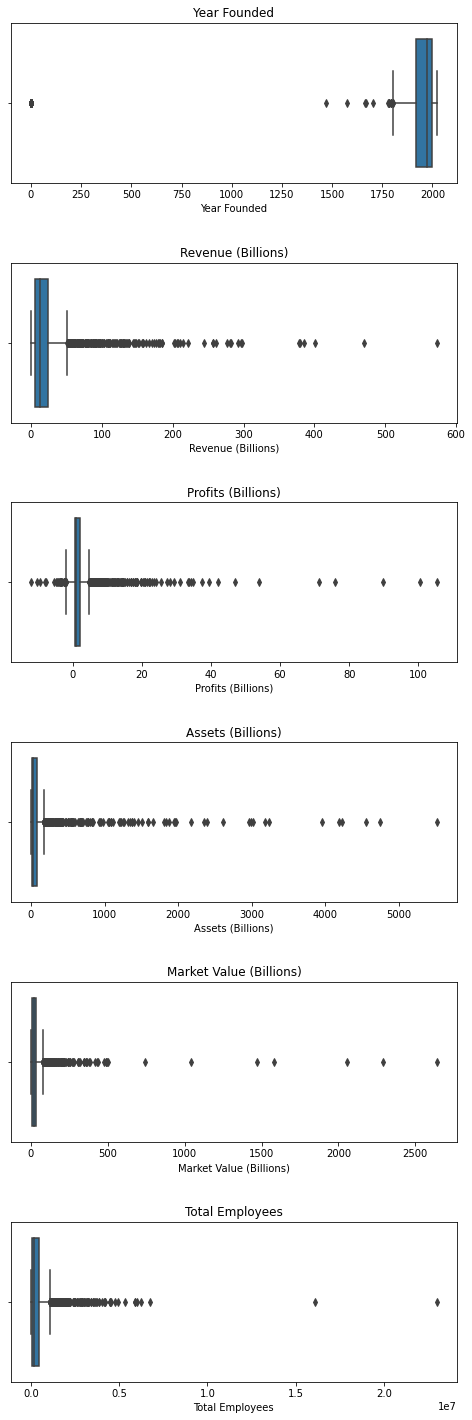

In [15]:
#manejo de outliers

columns_num = ['Year Founded', 'Revenue (Billions)','Profits (Billions)','Assets (Billions)','Market Value (Billions)', "Total Employees"]

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8,25))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_num):
    sns.boxplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(column)

In [16]:
#al ver datos muy grandes en el grafico se muestran los mas grandes con .nlargest 
df["Total Employees"].nlargest(10)

22     23000000
5      16080000
24      6727890
184     6240000
162     6000000
163     5922630
387     5921950
99      5340000
75      4906000
48      4776000
Name: Total Employees, dtype: int64

In [17]:
#se crea una funcion para encontrar los valores mas altos de una columna y su ubicacion 
def ubicacion_maximos(columna):
  maximos = df[columna].nlargest(10).index
  maximosdf = df.iloc[maximos]
  return maximosdf 

ubicacion_maximos("Total Employees")

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
22,23,Walmart,Retailing,United States,1962,C. Douglas McMillon,572.75,13.67,244.86,431.64,23000000
5,6,Amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,16080000
24,25,Volkswagen Group,Consumer Durables,German,1937,Herbert Diess,295.73,17.54,638.26,82.40,6727890
185,185,Honeywell International,Conglomerates,United States,1906,Darius Adamczyk,34.39,5.54,64.47,130.67,990000
162,163,FedEx,Transportation,United States,1971,Frederick W. Smith,91.55,5.13,84.11,53.19,6000000
163,164,Deutsche Post,Transportation,Germany,1995,Frank Appel,96.62,5.97,75.14,55.04,5922630
389,388,OMV Group,Oil & Gas Operations,Austria,1956,Alfred Stern,42.02,2.47,64.55,16.24,224340
99,100,United Parcel Service,Transportation,United States,1907,Carol B. Tomé,97.20,12.89,69.40,163.03,5340000
75,76,The Home Depot,Retailing,Canada,1978,Edward P. Decker,151.16,16.43,71.88,310.12,4906000
48,49,Gazprom,Oil & Gas Operations,Russia,1989,Alexei Borisovich Miller,117.30,25.44,360.47,63.56,4776000


Debido a que la columna deel total de empleados era muy imprecisa, contaba con valores erróneos y a la vez outliers, y así mismo, no iba a ser central para el análisis y visualización de valores y datos geográficos o de industria del data set, se toma la decisión de eliminar con:

In [18]:
df = df.drop(['Total Employees'], axis=1)

Verificamos y ya no está la columna:

In [19]:
df.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions)
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32


In [20]:
df.shape

(1999, 10)

Como se encuentran datos de "0" en la columna *"Year Founded"* estos se reemplazan primero por datos nulos y luego mediante el método `.ffil`, se toma el valor más cercano luego del valor nulo. Posterior, esta técnica puede dejar datos flotantes, entonces se asegura que el año será de un dato tipo *int*. 

In [21]:
df["Year Founded"].replace(0, np.nan, inplace=True)
df["Year Founded"].ffill(inplace=True)
df["Year Founded"] = df["Year Founded"].astype(int)

Se empiezan a definir funciones para ubicar los 10 valores minimos de una columna y hallar su ubicación en el DataFrame:

In [22]:
def ubicacion_minimos(columna):
  minimos = df[columna].nsmallest(10).index
  minimosdf = df.iloc[minimos]
  return minimosdf 

ubicacion_minimos('Year Founded')

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions)
1580,1577,News Corp,Media,United States,1922,Robert James Thomson,10.05,0.50,16.52,12.29
1139,1136,J Sainsbury,Food Markets,United Kingdom,1922,Simon John Roberts,40.82,0.39,34.62,7.17
285,285,Novo Nordisk,Drugs & Biotechnology,Denmark,1989,Lars Fruergaard Jørgensen,22.38,7.59,29.74,252.91
273,273,CaixaBank,Banking,Spain,1980,Gonzalo Gortázar Rotaeche,14.64,6.18,773.34,26.82
1442,1439,Xiamen Xiangyu,Transportation,China,1956,Qi Dong Deng,71.65,0.34,15.04,2.93
215,215,Philip Morris International,"Food, Drink & Tobacco",United States,1847,Jacek Olczak,31.51,9.00,41.73,159.18
874,871,Chunghwa Telecom,Telecommunications Services,Taiwan,1996,Shui-Yi Kuo,7.54,1.28,18.54,34.87
1035,1031,Invesco,Diversified Financials,United States,1935,Martin Flanagan,7.01,1.63,32.69,9.38
981,978,China International Marine,Capital Goods,China,1980,Bo Liang Mai,25.30,1.03,24.21,5.48
83,84,Cigna,Insurance,United States,1792,David Cordani,174.27,5.36,151.02,81.20


In [23]:
df['Year Founded'] = df['Year Founded'][df['Year Founded'] >= 1400]

In [24]:
df.shape

(1999, 10)

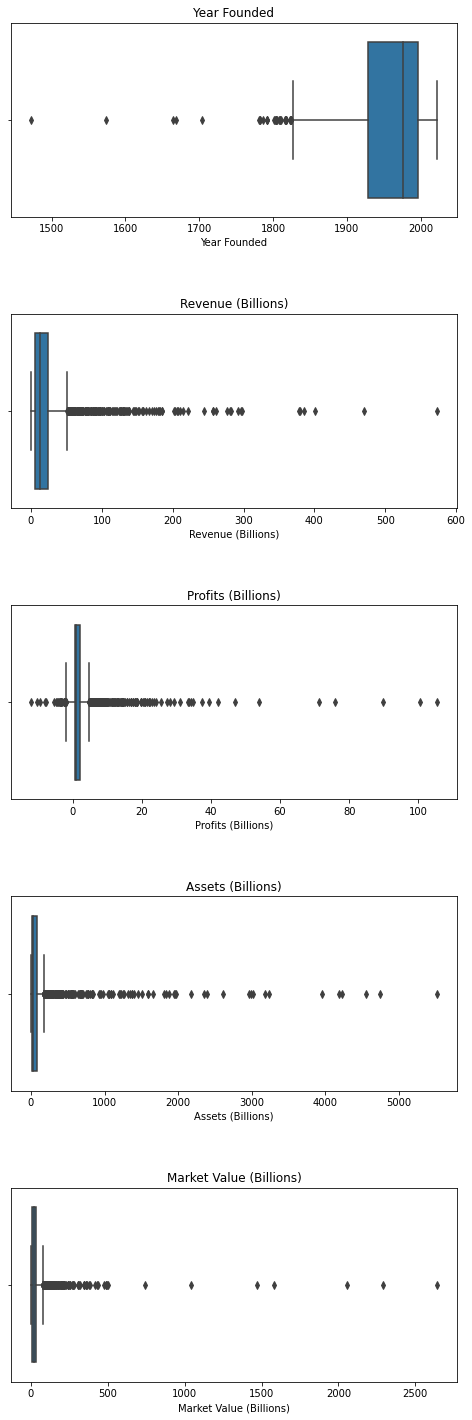

In [25]:
columns_num = ['Year Founded', 'Revenue (Billions)','Profits (Billions)','Assets (Billions)','Market Value (Billions)']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,25))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_num):
    sns.boxplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(column)

In [26]:
# Tipos de categorías en columnas tipo categóricas
columns_cat = ['Organization Name',  'Industry', 'Country', 'CEO']
for column in columns_cat:
  print(f'Columna {column}: {df[column].nunique()} categorías')

Columna Organization Name: 1999 categorías
Columna Industry: 32 categorías
Columna Country: 60 categorías
Columna CEO: 1963 categorías


In [27]:
#Columnas representables 
columns_cat_rp = ['Industry', 'Country']

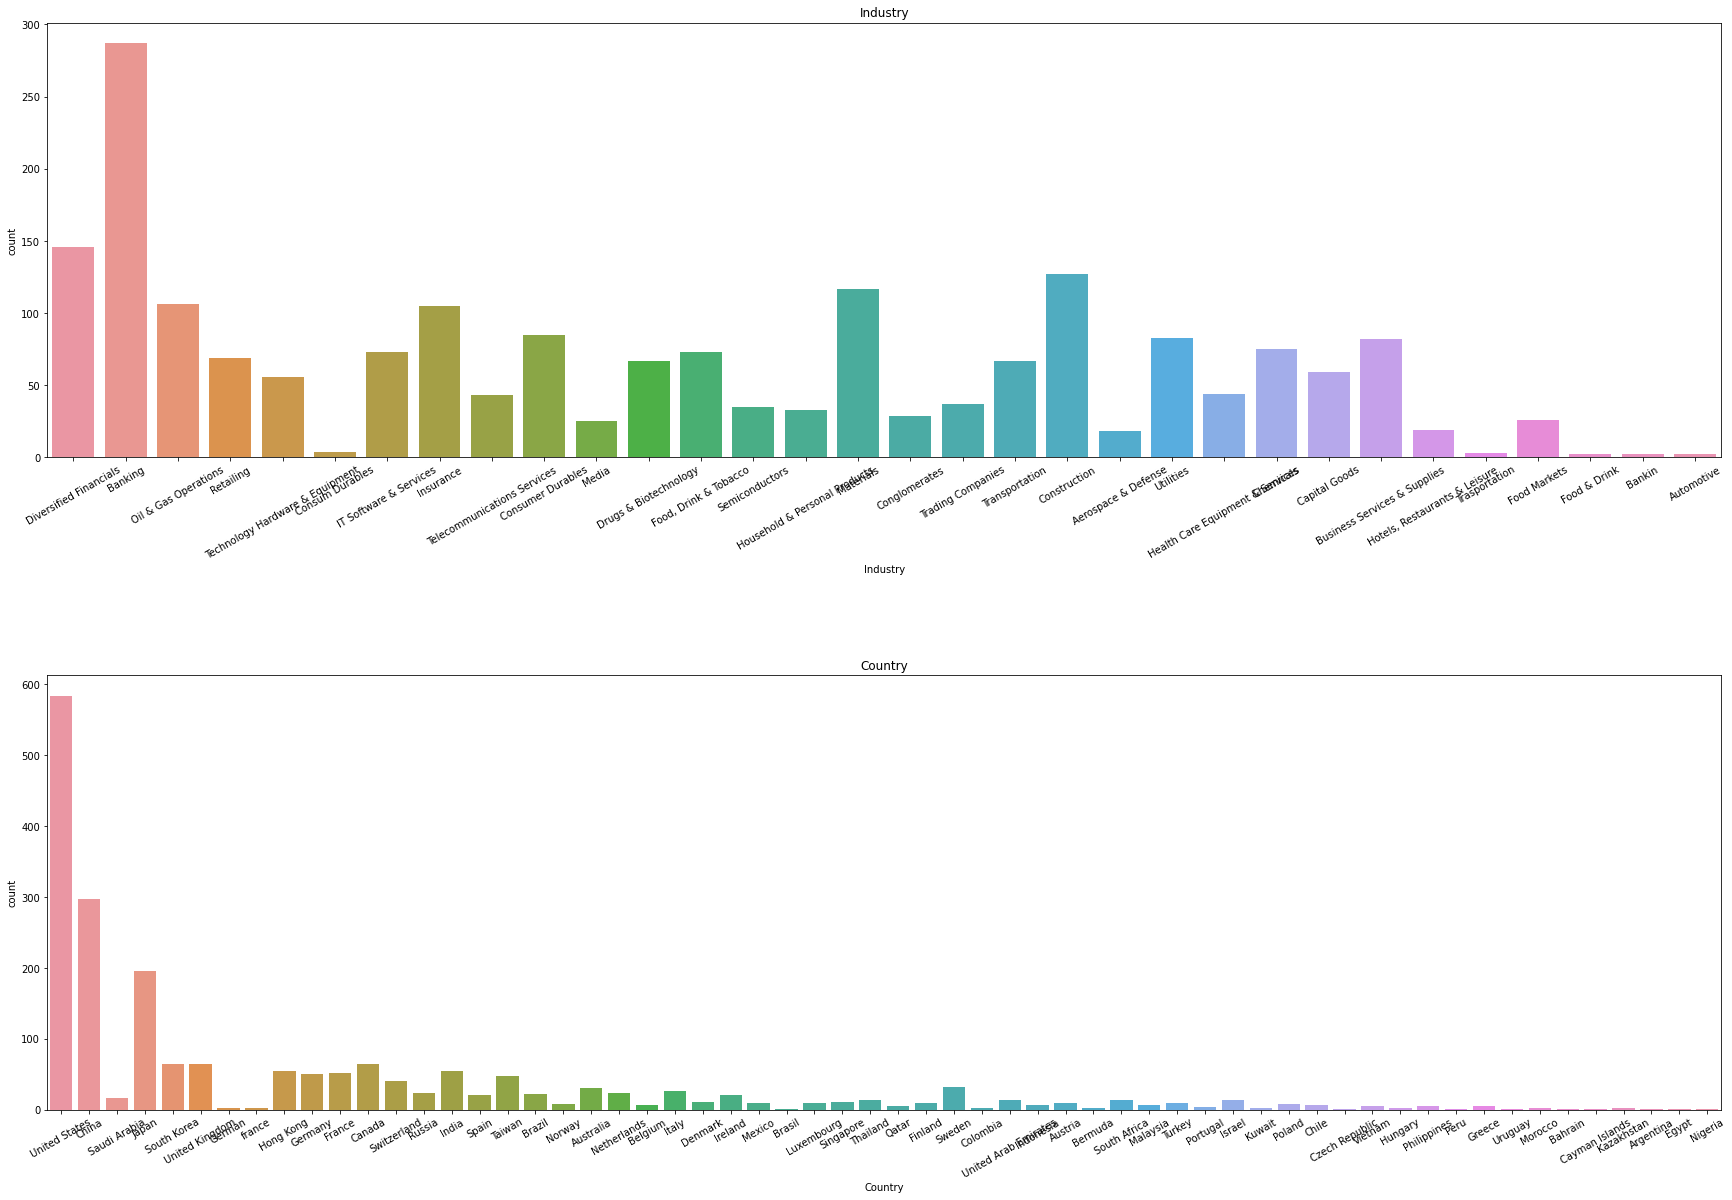

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat_rp):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [29]:
#Correciones tipográficas en Industry y Country
df["Industry"] = df["Industry"].replace({'Bankin':'Banking','Trasportation':'Transportation', 'Consum Durables':'Consumer Durables', 'Food & Drink' : 'Food, Drink & Tobacco'}, regex=True)
df["Country"] = df["Country"].replace({'Brasil':'Brazil','German':'Germany', 'france':'France'}, regex=True)
df["Country"] = df["Country"].replace({'Germanyy':'Germany'}, regex=True)

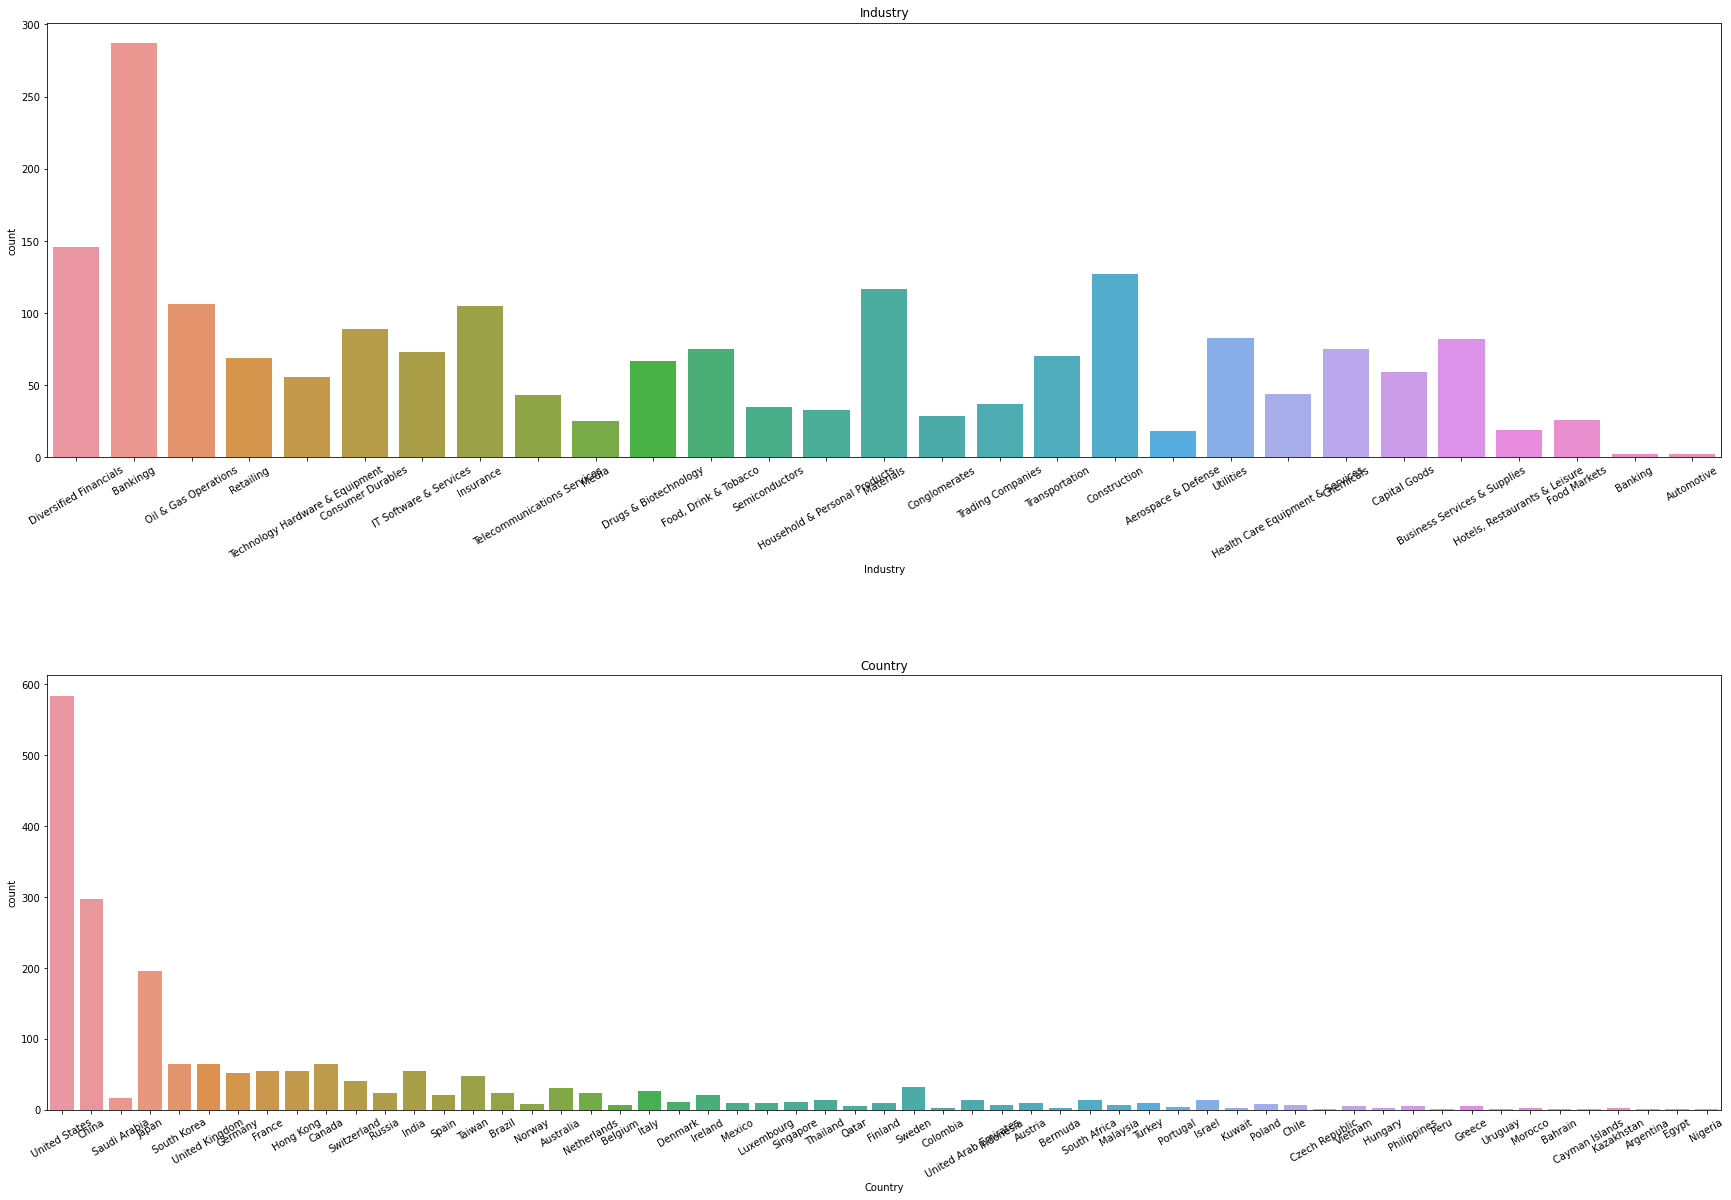

In [30]:
#verificacion grafica de la eliminacion de estos errores
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat_rp):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [31]:
#correcion de otro error que surge en el reemplazo
df["Industry"] = df["Industry"].replace({'Bankingg':'Banking'}, regex=True)

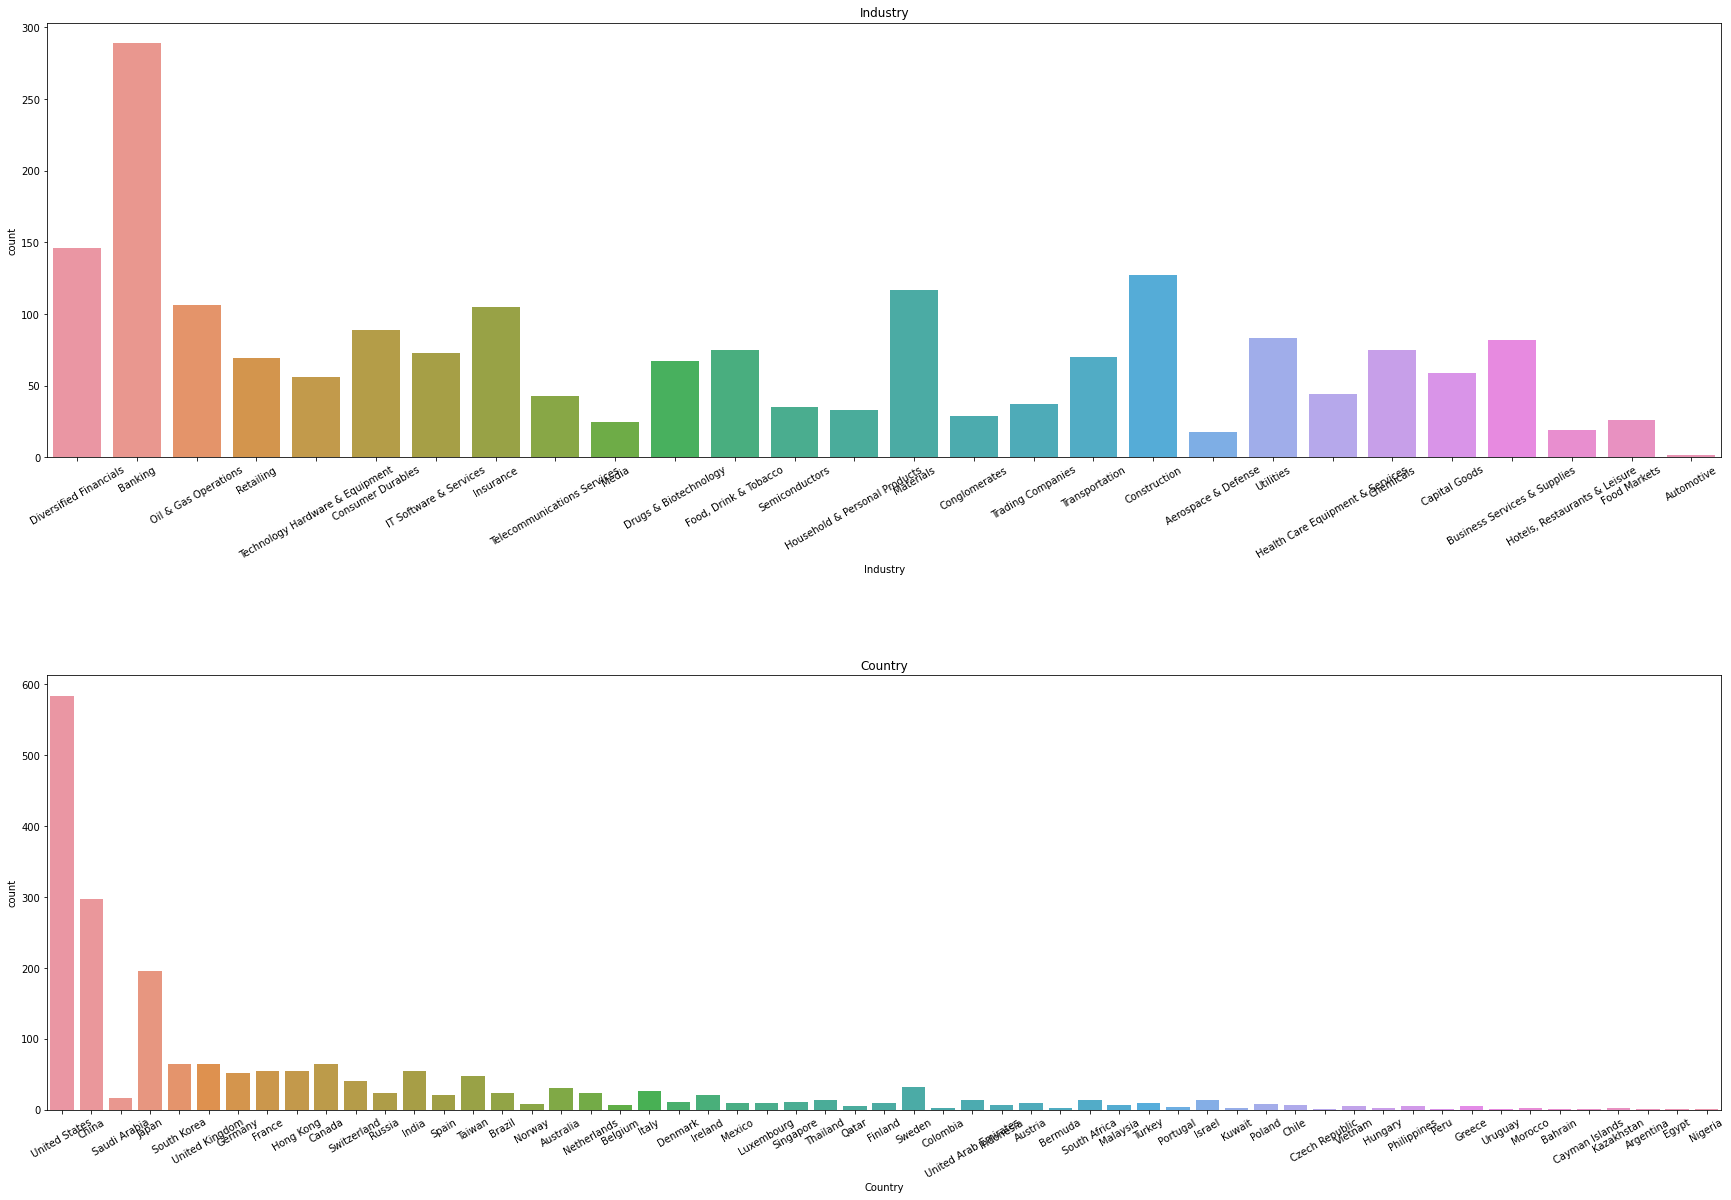

In [32]:
#verificacion grafica nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat_rp):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [33]:
#reflejar en el numero de categorías si dismuniyeron
for column in columns_cat_rp:
  print(f'Columna {column}: {df[column].nunique()} categorías')

Columna Industry: 28 categorías
Columna Country: 57 categorías


In [34]:
#KPI INDICE DE VALOR EN EL MERCADO SOBRE ACTIVOS
df["AssetsforMV"]=  df ["Market Value (Billions)"] / df["Assets (Billions)"]

In [35]:
df.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),AssetsforMV
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,0.773358
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,0.038855
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,3.979029
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,0.094685
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,0.038197


In [ ]:
df.to_csv('pruebaTecnica_sim.csv', encoding="utf-8", index=False, header=True)

In [ ]:
from google.colab import files
files.download('pruebaTecnica_sim.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualización de datos en Data Studio para presentación en Citigroup (simulación) sobre datos de importancia en el dataset: https://datastudio.google.com/reporting/32c78896-8cbf-4db3-9f78-516e7d32503b 

Desarrollado por: Lina Paola Perdomo - Data Analyst 

Github: https://github.com/linapaolap 